In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import operator
from  sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
import os
import re

#Colores par alas graficas
color = ['blue', 'gray', 'blueviolet', 'chartreuse', 'orange', 'deeppink', 'yellow', 'greenyellow', 'lightseagreen', 'red', 'saddlebrown']

### Instrucciones

Utilice regresión lineal mediante gradiente descendiente estocástico para generar una línea que 
se ajuste lo mejor posible a los datos (modificando parámetros max_iter,learning_rate y eta0) y reporte el error cuadrado medio(MSE)
y el coeficiente de determinación(r2)

Utilice regresión polinomial mediante gradiente descendiente estocástico con polinomios de grado 2 y 3 para generar una línea
curva que se ajuste lo mejor posible a los datos (modificando parámetros max_iter,learning_rate y eta0) y reporte MSE y r2

Almacene los valores MSE y r2 de cada pliegue y al terminar los 10 pliegues reporte el resultado promedio

* Realizar con datos crudos
* Probar con escalado estandar
* Probar con escalado robusto

In [2]:
files = os.listdir('./cross_validation_files')

#Expresion regular
train = re.compile('data_train_10_\d')
test = re.compile('target_train_10_\d')
data_train = []
target_train = []

for i in range(len(files)):
    #Si coinciden los nombres con la expresion regular guardarlos
    if train.search(files[i]):
        data_train.append(files[i])
    if test.search(files[i]):
        target_train.append(files[i])

data = [data_train, target_train]

In [3]:
def gradiente_descendiente_estocastica_lineal (learning_rate, eta0, iteraciones, data):

    mse = []
    r2 = []

    for i in range(len(data[0])):

        train_file = data[0][i]
        target_file = data[1][i]

        x = pd.read_csv(f"./cross_validation_files/{train_file}")
        y = pd.read_csv(f"./cross_validation_files/{target_file}")
        y = y.to_numpy()

        regr = SGDRegressor(learning_rate = learning_rate, eta0 = eta0, max_iter= iteraciones)
        #Converitr y a rreglo de 1 dimensión
        regr.fit(x, y.ravel())
        pred = regr.predict(x)

        mse.append(mean_squared_error(y, pred))
        r2.append(r2_score(y, pred))
        
        # ~ #Ajustes para que la curva trazada se vea correctamente
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, pred), key=sort_axis)
        
        x_sorted, pred = zip(*sorted_zip)
        print(pd.DataFrame({'x': np.reshape(x_sorted,(1,-1))[0], 'Predicted': pred}))
        plt.plot(x_sorted, pred, color= color[i], label = f'pliegue {str(i+1)}')
        plt.legend()
        print ('\nRegresión lineal \nmse: {} r2: {}'.format(mse[-1], r2[-1]),'\n')

    info = pd.DataFrame({'MSE': mse, 'r2':r2})

    print(info)

In [4]:
def gradiente_descendiente_estocastica_polinomial (learning_rate, eta0, iteraciones, polinomio, data, estandar, robusto):

    mse = []
    r2 = []

    for i in range(len(data[0])):

        train_file = data[0][i]
        target_file = data[1][i]

        x = pd.read_csv(f"./cross_validation_files/{train_file}")
        y = pd.read_csv(f"./cross_validation_files/{target_file}")
        y = y.to_numpy()

        polynomial_features= PolynomialFeatures(degree=polinomio)
        x_poly = polynomial_features.fit_transform(x)

        if estandar is True :
            x_poly = preprocessing.StandardScaler().fit_transform(x_poly)

        if robusto is True :
            x_poly = preprocessing.RobustScaler().fit_transform(x_poly)
        # x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)

        regr = SGDRegressor(learning_rate = learning_rate, eta0 = eta0, max_iter= iteraciones)
        #Converitr y a rreglo de 1 dimensión
        regr.fit(x_poly, y.ravel())
        pred = regr.predict(x_poly)

        mse.append(mean_squared_error(y, pred))
        r2.append(r2_score(y, pred))
        
        # ~ #Ajustes para que la curva trazada se vea correctamente
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, pred), key=sort_axis)
        
        x_sorted, pred = zip(*sorted_zip)
        print(pd.DataFrame({'x': np.reshape(x_sorted,(1,-1))[0], 'Predicted': pred}))
        plt.plot(x_sorted, pred, color= color[i], label = f'pliegue {str(i+1)}')
        plt.legend()
        print ('\nRegresión polinomial grado  {}\nmse: {} r2: {}'.format(polinomio, mse[-1], r2[-1]),'\n')

    info = pd.DataFrame({'MSE': mse, 'r2':r2})

    print(info)

#constant
#optimal
#invscaling
#adaptive

                  x      Predicted
0        households  187446.236715
1  housingMedianAge  158954.317752
2          latitude  165554.024357
3         longitude  149675.400457
4      medianIncome  290784.218070
5        population  201975.655370
6     totalBedrooms  192842.826587
7        totalRooms  141120.397152

Regresión lineal 
mse: 13196273150.811852 r2: 0.049414994865129014 

                  x      Predicted
0        households  186323.431433
1  housingMedianAge  145951.031059
2          latitude  181839.779221
3         longitude  190115.540414
4      medianIncome  162867.737267
5        population  131048.944610
6     totalBedrooms  217850.432993
7        totalRooms  178972.136501

Regresión lineal 
mse: 13167044278.004795 r2: 0.009135087874986292 

                  x      Predicted
0        households  290526.255975
1  housingMedianAge  216876.580462
2          latitude  215635.017484
3         longitude  208376.594116
4      medianIncome  370014.174848
5        population 

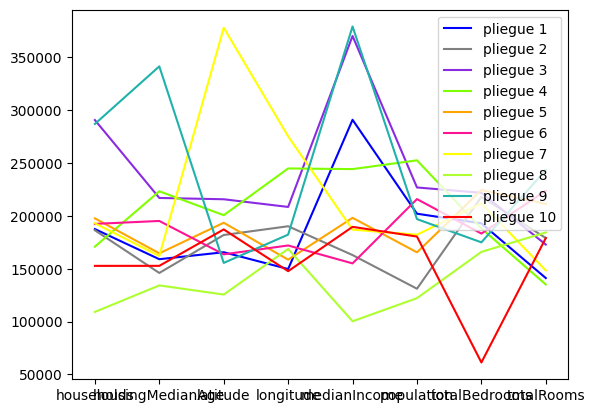

In [5]:
gradiente_descendiente_estocastica_lineal('constant', 0.000000001, 100000000, data)

                  x     Predicted
0        households  1.107063e+10
1  housingMedianAge -7.554916e+10
2          latitude -1.733579e+11
3         longitude -5.365224e+09
4      medianIncome  1.009713e+12
5        population  9.199515e+09
6     totalBedrooms -2.599701e+10
7        totalRooms -6.165546e+10

Regresión polinomial grado  2
mse: 3.353039431924831e+23 r2: -24153402776582.18 

                  x     Predicted
0        households  2.128847e+11
1  housingMedianAge  4.955287e+10
2          latitude  1.573757e+11
3         longitude  1.373561e+11
4      medianIncome  8.083493e+10
5        population  2.154335e+11
6     totalBedrooms  6.266763e+11
7        totalRooms  1.045717e+11

Regresión polinomial grado  2
mse: 1.1604897643591756e+24 r2: -87330805920093.86 

                  x     Predicted
0        households -1.161863e+11
1  housingMedianAge -1.371169e+10
2          latitude -2.432441e+10
3         longitude  1.989948e+10
4      medianIncome -1.304770e+11
5        populati

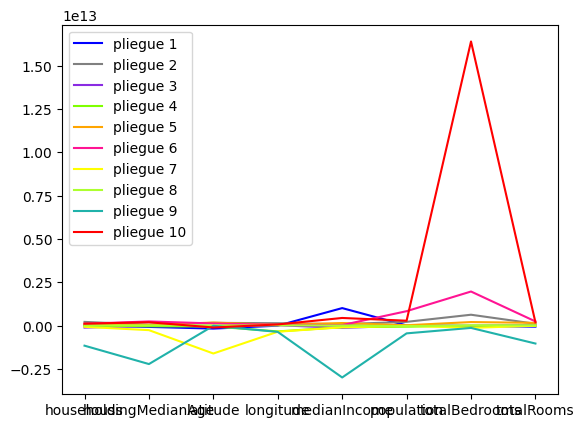

In [6]:
gradiente_descendiente_estocastica_polinomial('constant', 0.000000000000001, 100000000, 2, data, False, False)

                  x      Predicted
0        households  267009.783197
1  housingMedianAge  219047.289727
2          latitude  274760.208160
3         longitude  197421.891879
4      medianIncome  582272.560165
5        population  420442.560550
6     totalBedrooms  291477.937542
7        totalRooms  111015.254986

Regresión polinomial grado  2
mse: 4332921494.711737 r2: 0.6878808013271418 

                  x      Predicted
0        households  278049.079553
1  housingMedianAge  209363.543996
2          latitude  220563.126948
3         longitude  251246.820802
4      medianIncome  256149.927559
5        population  151666.947264
6     totalBedrooms  244623.781525
7        totalRooms  188259.337361

Regresión polinomial grado  2
mse: 3808045425.560788 r2: 0.7134316163674272 

                  x      Predicted
0        households  359808.450149
1  housingMedianAge  215731.796049
2          latitude  356033.247055
3         longitude  323791.880331
4      medianIncome  333410.272464
5 

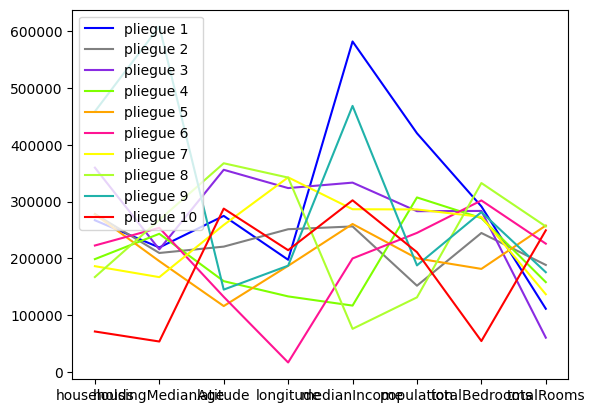

In [7]:
gradiente_descendiente_estocastica_polinomial('constant', 0.00001, 10000000, 2, data, True, False)

                  x      Predicted
0        households  272019.122914
1  housingMedianAge  217904.916618
2          latitude  273178.945705
3         longitude  201041.948089
4      medianIncome  610755.192002
5        population  428173.755489
6     totalBedrooms  295404.154543
7        totalRooms  102381.346964

Regresión polinomial grado  2
mse: 4329134835.198952 r2: 0.6881535708971005 

                  x      Predicted
0        households  275235.153003
1  housingMedianAge  188179.521605
2          latitude  194108.492329
3         longitude  251820.027732
4      medianIncome  251101.271917
5        population  148296.039907
6     totalBedrooms  232983.060737
7        totalRooms  179268.246117

Regresión polinomial grado  2
mse: 3897185362.8677874 r2: 0.7067235325878295 

                  x      Predicted
0        households  356361.128677
1  housingMedianAge  218549.609042
2          latitude  366099.068646
3         longitude  329003.088001
4      medianIncome  314911.946030
5

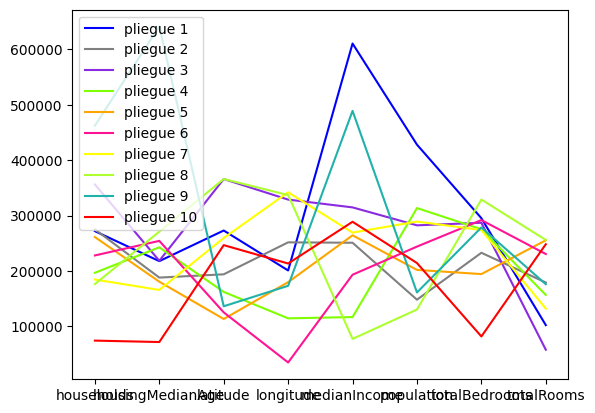

In [8]:
gradiente_descendiente_estocastica_polinomial('adaptive', 0.00001, 10000000, 2, data, False, True)

                  x     Predicted
0        households -2.115249e+21
1  housingMedianAge -5.716105e+21
2          latitude -1.510558e+22
3         longitude -1.351399e+20
4      medianIncome -7.150786e+23
5        population -1.519229e+22
6     totalBedrooms -1.505235e+22
7        totalRooms -3.975773e+20

Regresión polinomial grado  3
mse: 5.212674524651021e+47 r2: -3.7549163943131613e+37 

                  x     Predicted
0        households  6.113574e+22
1  housingMedianAge  3.951627e+21
2          latitude  4.054120e+22
3         longitude  3.353992e+22
4      medianIncome  1.746115e+22
5        population  5.551698e+22
6     totalBedrooms  3.336236e+23
7        totalRooms  1.390028e+22

Regresión polinomial grado  3
mse: 1.0924584547353721e+49 r2: -8.221121824279464e+38 

                  x     Predicted
0        households -1.169390e+23
1  housingMedianAge -3.109034e+22
2          latitude -9.052028e+21
3         longitude -1.341917e+22
4      medianIncome -1.112463e+24
5       

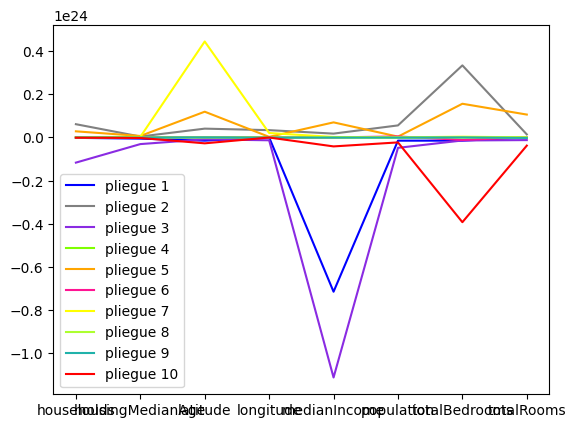

In [9]:
gradiente_descendiente_estocastica_polinomial('constant', 0.0000000000001, 1000000000, 3, data, False, False)

                  x      Predicted
0        households  265695.876727
1  housingMedianAge  217541.660429
2          latitude  279557.397441
3         longitude  191665.179347
4      medianIncome  577956.230208
5        population  436219.128420
6     totalBedrooms  303781.312936
7        totalRooms  106410.519516

Regresión polinomial grado  3
mse: 4202468785.9425635 r2: 0.697277877866708 

                  x      Predicted
0        households  279172.100714
1  housingMedianAge  202712.536945
2          latitude  215347.362903
3         longitude  252806.447512
4      medianIncome  253928.487241
5        population  152546.502440
6     totalBedrooms  240817.981735
7        totalRooms  187019.994343

Regresión polinomial grado  3
mse: 3687821717.6105585 r2: 0.7224788597197143 

                  x      Predicted
0        households  365736.951511
1  housingMedianAge  222148.407747
2          latitude  367618.202594
3         longitude  332108.718071
4      medianIncome  319222.178707
5

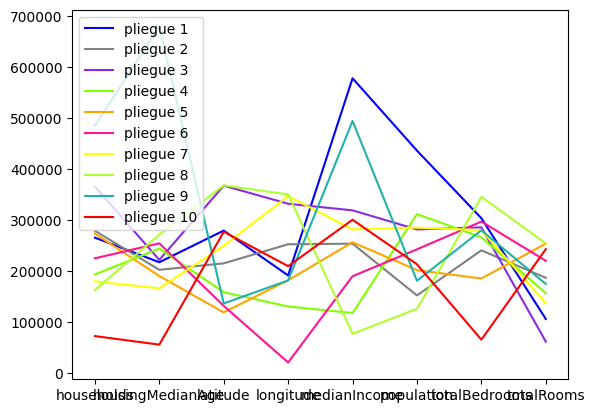

In [10]:
gradiente_descendiente_estocastica_polinomial('constant', 0.00001, 1000000000, 3, data, True, False)

                  x      Predicted
0        households  217430.560311
1  housingMedianAge  133488.714175
2          latitude  299282.650971
3         longitude  153946.737975
4      medianIncome  649263.309306
5        population  405884.169770
6     totalBedrooms  253952.372586
7        totalRooms   54603.902263

Regresión polinomial grado  3
mse: 7394339223.936552 r2: 0.46735355438423354 

                  x      Predicted
0        households   83610.440224
1  housingMedianAge  -21612.755700
2          latitude    3679.106950
3         longitude  128968.736960
4      medianIncome   48368.148803
5        population   27181.449114
6     totalBedrooms   67420.743738
7        totalRooms   69679.983759

Regresión polinomial grado  3
mse: 26586804634.93469 r2: -1.0007475696186665 

                  x      Predicted
0        households  332271.041749
1  housingMedianAge  235316.051403
2          latitude  383745.378967
3         longitude  358325.937702
4      medianIncome  323773.519565


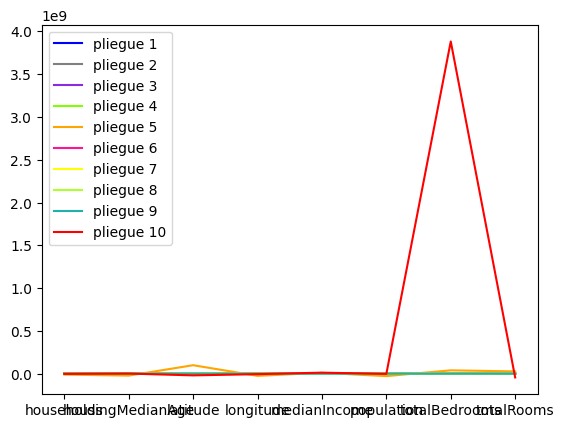

In [11]:
gradiente_descendiente_estocastica_polinomial('adaptive', 0.0000001, 1000000000, 3, data, False, True)